---

## **Modelo de Machine Learning** para predecir la ESPERANZA DE VIDA en un país determinado a partir de diferentes indicadores asociados a factores de economía, educación, salud, ciencia y tecnología y desarrollo social.

---

Comenzamos a trabajar en el desarrollo del modelo de machine learning. 
En una primera parte realizaremos el análisis exploratorio de los datos para quedarnos con un dataset limpio y ordenado, seleccionando aquellas variables que nos permita realizar un modelado adecuado. 
Luego procederemos a entrenar el modelo y por último realizaremos las evaluaciones pertinentes sobre el resultado de nuestro modelo.

## EDA

In [2]:
import numpy as np
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Leemos el archivo que vamos a trabajar, el mismo proviene del proceso de ETL realizado previamente y refiere a la tabla de Hechos definida en nuestra base de datos

In [3]:
data = pd.read_csv('facts.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'facts.csv'

In [ ]:
data

,country_id,series_id,year,value
0,ARG,GC.XPN.TOTL.GD.ZS,1993,14.281856
1,ARG,GC.XPN.TOTL.GD.ZS,1994,14.900792
2,ARG,GC.XPN.TOTL.GD.ZS,1995,15.511231
3,ARG,GC.XPN.TOTL.GD.ZS,1996,15.165548
4,ARG,GC.XPN.TOTL.GD.ZS,1997,15.014222
...,...,...,...,...
17995,VEN,SL.UEM.TOTL.ZS,2018,5.020000
17996,VEN,SL.UEM.TOTL.ZS,2019,5.092000
17997,VEN,SL.UEM.TOTL.ZS,2020,7.530000
17998,VEN,SL.UEM.TOTL.ZS,2021,6.471000


### Revisión de nulos

Observamos la cantidad de nulos que tenemos por cada variable

In [ ]:
data_null = data[data['value'].isna()]
series = data_null['series_id'].unique()
countries = data_null['country_id'].unique()
naSummary = pd.DataFrame(columns=['country_id','series','#NaN'])
for c in countries:
    df_facts_null_c = data_null[data_null['country_id']==c]
    for s in series:
        df_facts_null_cs = df_facts_null_c[df_facts_null_c['series_id']==s]
        l = sum(df_facts_null_cs['value'].isna())
        if l > 0:
            naSummary = pd.concat([naSummary,pd.DataFrame([[c,s,l]],columns=['country_id','series','#NaN'])],ignore_index=True)

naSummary

,country_id,series,#NaN
0,ARG,GC.XPN.TOTL.GD.ZS,10
1,ARG,SE.XPD.TOTL.GD.ZS,5
2,ARG,SE.XPD.PRIM.PC.ZS,10
3,ARG,SE.ADT.LITR.ZS,29
4,ARG,SH.XPD.GHED.GD.ZS,9
...,...,...,...
463,CAN,GB.XPD.RSDV.GD.ZS,5
464,CAN,SP.POP.SCIE.RD.P6,7
465,CAN,SI.POV.GINI,3
466,CAN,VC.IHR.PSRC.P5,1


In [ ]:
#total de nulos
naSummary['#NaN'].sum()

4789

Agrupamos los datos nulos por variable y pais

In [ ]:
naSummary.groupby('series').sum().sort_values('#NaN')

,country_id,#NaN
series,,
NY.GDP.PCAP.CD,CUBSYRVEN,12
NE.RSB.GNFS.CD,BOLCUBJPNNZLQATSYRVENUSA,18
NY.GDP.MKTP.KD.ZG,CUBQATSYRVEN,19
SP.DYN.LE00.IN,ARGAUSBOLBRACHLCHNCOLCUBDOMSLVFINFRADEUINDJPNK...,30
SH.DYN.NMRT,ARGAUSBOLBRACHLCHNCOLCUBDOMSLVFINFRADEUINDJPNK...,30
SH.DYN.MORT,ARGAUSBOLBRACHLCHNCOLCUBDOMSLVFINFRADEUINDJPNK...,30
NY.GNP.PCAP.CD,CUBQATCHESYRVEN,31
IP.PAT.RESD,ARGAUSBOLBRACHLCHNCOLCUBDOMSLVFINFRADEUINDJPNK...,133
VC.IHR.PSRC.P5,ARGAUSBOLBRACHLCHNCOLCUBDOMSLVFINFRADEUINDJPNK...,141


Se observa que 19 de las 20 variables con las que contamos contienen valores nulos

Nos quedamos con las variables que tienen menos de 30 nulos por pais

In [ ]:
naSummaryLess10 = naSummary[naSummary['#NaN']<30]
naSummaryLess10

,country_id,series,#NaN
0,ARG,GC.XPN.TOTL.GD.ZS,10
1,ARG,SE.XPD.TOTL.GD.ZS,5
2,ARG,SE.XPD.PRIM.PC.ZS,10
3,ARG,SE.ADT.LITR.ZS,29
4,ARG,SH.XPD.GHED.GD.ZS,9
...,...,...,...
462,CAN,IP.PAT.RESD,1
463,CAN,GB.XPD.RSDV.GD.ZS,5
464,CAN,SP.POP.SCIE.RD.P6,7
465,CAN,SI.POV.GINI,3


In [ ]:
#total de nulos actuales
naSummaryLess10['#NaN'].sum()

3649

### Imputación de valores nulos

En esta sección procederemos a imputar los valores nulos utilizando el modelo ARIMA (AutoRegressive Integrated Moving Average) el mismo es un modelo estadístico ampliamente utilizado para analizar y predecir series temporales.

Como contamos con un dataset con relativamente pocos años de análisis, consideramos aumentar la cantidad de años para combinarlo con el dataset utilizado hasta aqui y lograr una mejor performance del modelo ARIMA y así obtener mejores predicciones para nuestras imputaciones. Para esto se creo una tabla en la sección de ETL con datos desde el año 1960 a utilizar a continuación.

In [ ]:
data_60 = pd.read_csv('facts_1960.csv')
data_60.head()

,country_id,series_id,year,value
0,ARG,GC.XPN.TOTL.GD.ZS,1960,NaN
1,ARG,GC.XPN.TOTL.GD.ZS,1961,NaN
2,ARG,GC.XPN.TOTL.GD.ZS,1962,NaN
3,ARG,GC.XPN.TOTL.GD.ZS,1963,NaN
4,ARG,GC.XPN.TOTL.GD.ZS,1964,NaN


In [ ]:
print('cantidad de nulos previamente:', data_60.value.isna().sum())

cantidad de nulos previamente: 17190


Procedemos a trabajar con el modelo ARIMA

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
for i in range(len(naSummaryLess10)):
    c = naSummaryLess10.iloc[i,0]
    s = naSummaryLess10.iloc[i,1]
    df_facts_cs = data_60[(data_60['country_id']==c)&(data_60['series_id']==s)]

    #print(df_facts_cs)
    
    y = df_facts_cs['value'].values
    ARIMAmodel = ARIMA(y, order = (1, 0, 1))
    ARIMAmodel = ARIMAmodel.fit()

    indexNaN = df_facts_cs[df_facts_cs['value'].isna()].index
    for j in indexNaN:
        year = int(df_facts_cs.loc[j,'year'])
        if year >= 1993:
            x = year - 1960
            y_pred = ARIMAmodel.predict(x)
            #print('Imputation on country: ',c,', series: ',s,', year: ',str(year),' and value: ',y_pred[0])

            df_facts_cs.loc[j,'value'] = y_pred[0]

    data_60[(data_60['country_id']==c)&(data_60['series_id']==s)] = df_facts_cs

    

c:\Users\LENOVO IDEAPAD\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\LENOVO IDEAPAD\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\LENOVO IDEAPAD\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\LENOVO IDEAPAD\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\mode

In [ ]:
print('cantidad de nulos posteriormente:', data_60.value.isna().sum())

cantidad de nulos posteriormente: 13541


In [ ]:
indicators = ["GC.XPN.TOTL.GD.ZS", "NE.RSB.GNFS.CD", "NY.GDP.MKTP.KD.ZG", "NY.GDP.PCAP.CD",
                "NY.GNP.PCAP.CD", "SE.XPD.TOTL.GD.ZS", "SE.XPD.PRIM.PC.ZS", "SE.ADT.LITR.ZS",
                "SH.XPD.GHED.GD.ZS", "SP.DYN.LE00.IN", "SH.DYN.NMRT", "SH.DYN.MORT",
                "SN.ITK.DEFC.ZS", "IP.PAT.RESD", "GB.XPD.RSDV.GD.ZS", "SP.POP.SCIE.RD.P6",
                "SI.POV.GINI", "VC.IHR.PSRC.P5", "SI.POV.NAHC", "SL.UEM.TOTL.ZS"]

Chequeamos los nulos resultantes por variable y pais 

In [ ]:
data_30 = data_60[data_60['year'].astype(int)>=1993]
data_null = data_30[data_30['value'].isna()]
series = data_null['series_id'].unique()
countries = data_null['country_id'].unique()
naSummary = pd.DataFrame(columns=['country_id','series','#NaN'])
for c in countries:
    data_null_c = data_null[data_null['country_id']==c]
    for s in series:
        data_null_cs = data_null_c[data_null_c['series_id']==s]
        l = sum(data_null_cs['value'].isna())
        if l > 0:
            naSummary = pd.concat([naSummary,pd.DataFrame([[c,s,l]],columns=['country_id','series','#NaN'])],ignore_index=True)

for i in indicators:
    if i not in naSummary['series'].values:
        naSummary = pd.concat([naSummary,pd.DataFrame([['',i,0]],columns=['country_id','series','#NaN'])],ignore_index=True)

naSummary

,country_id,series,#NaN
0,CHN,GC.XPN.TOTL.GD.ZS,30
1,CUB,GC.XPN.TOTL.GD.ZS,30
2,CUB,SP.POP.SCIE.RD.P6,30
3,CUB,SI.POV.GINI,30
4,CUB,SI.POV.NAHC,30
5,QAT,GC.XPN.TOTL.GD.ZS,30
6,QAT,SN.ITK.DEFC.ZS,30
7,QAT,SI.POV.GINI,30
8,QAT,SI.POV.NAHC,30
9,SYR,GC.XPN.TOTL.GD.ZS,30


In [ ]:
#total de nulos luego de imputar
naSummary['#NaN'].sum()

1140

Observamos cuales variables nos han quedado sin valores nulos 

In [ ]:
naSummary.groupby('series').sum().sort_values('#NaN')

,country_id,#NaN
series,,
SE.XPD.TOTL.GD.ZS,,0
SP.DYN.LE00.IN,,0
SL.UEM.TOTL.ZS,,0
SH.XPD.GHED.GD.ZS,,0
SH.DYN.NMRT,,0
SH.DYN.MORT,,0
VC.IHR.PSRC.P5,,0
NY.GDP.PCAP.CD,,0
NY.GDP.MKTP.KD.ZG,,0


Extraemos las series sin nulos

In [ ]:
series_sin_nulos = naSummary[naSummary['#NaN'] == 0]['series'].tolist()

# Muestra las series sin nulos
series_sin_nulos

['NE.RSB.GNFS.CD',
 'NY.GDP.MKTP.KD.ZG',
 'NY.GDP.PCAP.CD',
 'NY.GNP.PCAP.CD',
 'SE.XPD.TOTL.GD.ZS',
 'SH.XPD.GHED.GD.ZS',
 'SP.DYN.LE00.IN',
 'SH.DYN.NMRT',
 'SH.DYN.MORT',
 'IP.PAT.RESD',
 'VC.IHR.PSRC.P5',
 'SL.UEM.TOTL.ZS']

Comparamos graficamente los datos con y sin imputación para observar los cambios

In [ ]:
data_60_NaN = pd.read_csv('facts_1960.csv')

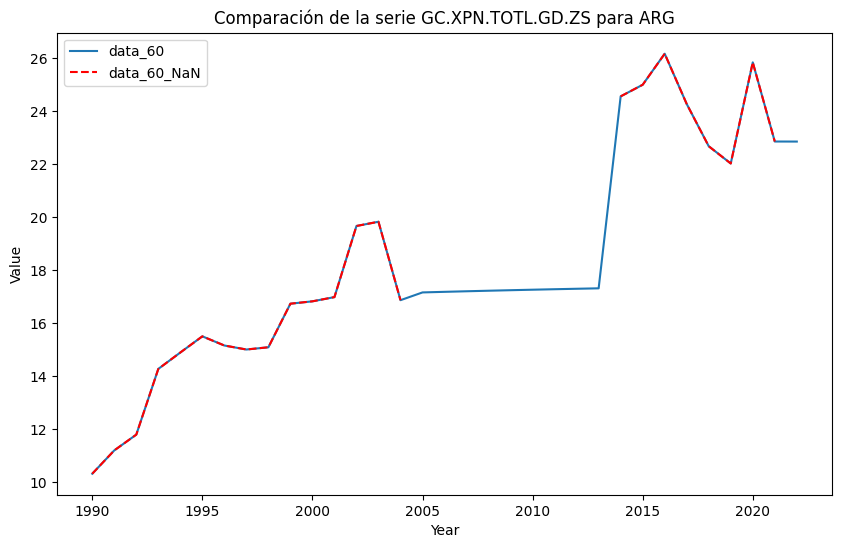

In [ ]:
import matplotlib.pyplot as plt

# Filtrar los datos para la serie y país específicos
serie = 'GC.XPN.TOTL.GD.ZS'
pais = 'ARG'
data_serie = data_60[(data_60['series_id'] == serie) & (data_60['country_id'] == pais)]
data_serie_nan = data_60_NaN[(data_60_NaN['series_id'] == serie) & (data_60_NaN['country_id'] == pais)]

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.plot(data_serie['year'], data_serie['value'], label='data_60')
plt.plot(data_serie_nan['year'], data_serie_nan['value'], label='data_60_NaN', linestyle='dashed', color='red')

# Agregar etiquetas y leyenda
plt.xlabel('Year')
plt.ylabel('Value')
plt.title(f'Comparación de la serie {serie} para {pais}')
plt.legend()

# Mostrar el gráfico
plt.show()

Como se pudo observar, de las 19 variables que contenían valores nulos antes de las imputaciones, sólo nos han quedado 8. Esto nos permite llevar la cantidad de variables aptas para consumir por el modelo de predicción de 1 a 12. Consideramos que es una cantidad de datos adecuada para obtener resultados satisfactorios.

### Revisión de duplicados

In [ ]:
data.duplicated().sum()

0

## Modelado

### Reconfiguración del dataset

Como se observa, la estructura del dataframe no es el más adecuado para el modelado que queremos realizar, por lo tanto procedemos a darle una estructura más óptima

In [ ]:
data_30

,country_id,series_id,year,value
33,ARG,GC.XPN.TOTL.GD.ZS,1993,14.281856
34,ARG,GC.XPN.TOTL.GD.ZS,1994,14.900792
35,ARG,GC.XPN.TOTL.GD.ZS,1995,15.511231
36,ARG,GC.XPN.TOTL.GD.ZS,1996,15.165548
37,ARG,GC.XPN.TOTL.GD.ZS,1997,15.014222
...,...,...,...,...
37795,VEN,SL.UEM.TOTL.ZS,2018,5.020000
37796,VEN,SL.UEM.TOTL.ZS,2019,5.092000
37797,VEN,SL.UEM.TOTL.ZS,2020,7.530000
37798,VEN,SL.UEM.TOTL.ZS,2021,6.471000


In [ ]:
# Filtrar las filas que corresponden a las series sin nulos
data_filtrado = data_30[data_30['series_id'].isin(series_sin_nulos)]

# Crear una tabla pivote
data = data_filtrado.pivot_table(index=['country_id', 'year'], columns='series_id', values='value').reset_index()

# Mostrar el DataFrame resultante
data.head()

series_id,country_id,year,IP.PAT.RESD,NE.RSB.GNFS.CD,NY.GDP.MKTP.KD.ZG,NY.GDP.PCAP.CD,NY.GNP.PCAP.CD,SE.XPD.TOTL.GD.ZS,SH.DYN.MORT,SH.DYN.NMRT,SH.XPD.GHED.GD.ZS,SL.UEM.TOTL.ZS,SP.DYN.LE00.IN,VC.IHR.PSRC.P5
0,ARG,1993,787.0,-5.692332e+09,8.206979,6957.417499,7110.0,1.323882,26.5,14.4,5.385922,10.10,72.565,6.20175
1,ARG,1994,694.0,-7.914860e+09,5.836201,7464.474737,7600.0,1.401981,25.4,14.2,5.385922,11.76,73.172,6.20175
2,ARG,1995,676.0,-1.059485e+09,-2.845210,7383.704510,7340.0,1.476775,24.3,13.6,5.385922,18.80,73.133,6.20175
3,ARG,1996,1097.0,-1.767000e+09,5.526690,7690.157003,7700.0,3.731980,23.2,12.6,5.385922,17.11,73.307,6.20175
4,ARG,1997,824.0,-6.485300e+09,8.111047,8176.771195,8110.0,3.702754,22.2,11.5,5.385922,14.82,73.090,6.20175


Cambiamos los nombres a las variables para identificarlas 

In [ ]:
nombres = {
    'GC.XPN.TOTL.GD.ZS': 'Gasto(%_PIB)',
    'NE.RSB.GNFS.CD': 'Bal_comercial(US$)',
    'NY.GDP.MKTP.KD.ZG': 'PIB_crec(%_anual)',
    'NY.GDP.PCAP.CD': 'PIB_per_cap(US$)',
    'NY.GNP.PCAP.CD':'INB_per_cap(US$)',
    'SE.XPD.TOTL.GD.ZS':'Educacion(%_PIB)',
    'SE.XPD.PRIM.PC.ZS':'Gasto_alumno_primaria(%_PIB_per_capita)',
    'SE.ADT.LITR.ZS':'Tasa_alfabetizacion_adultos(%15_años_o_mas)',
    'SH.XPD.GHED.GD.ZS':'Salud(%_PIB)',
    'SP.DYN.LE00.IN':'EDV',
    'SH.DYN.NMRT':'Mortalidad_neo',
    'SH.DYN.MORT':'Mortalidad_5',
    'SN.ITK.DEFC.ZS':'Desnutricion(%_poblacion)',
    'IP.PAT.RESD':'Patentes',
    'GB.XPD.RSDV.GD.ZS':'I+D(%_PIB)',
    'SP.POP.SCIE.RD.P6':'Investigadores',
    'SI.POV.GINI':'Gini',
    'VC.IHR.PSRC.P5':'Homicidios',
    'SI.POV.NAHC':'Pobreza',
    'SL.UEM.TOTL.ZS':'Desempleo',
    'year':'Año',
    'country_id':'Pais_id'
}

In [ ]:
# Renombrar las columnas utilizando el método rename
data.rename(columns=nombres, inplace=True)

In [ ]:
data

series_id,Pais_id,Año,Patentes,Bal_comercial(US$),PIB_crec(%_anual),PIB_per_cap(US$),INB_per_cap(US$),Educacion(%_PIB),Mortalidad_5,Mortalidad_neo,Salud(%_PIB),Desempleo,EDV,Homicidios
0,ARG,1993,787.000000,-5.692332e+09,8.206979,6957.417499,7110.000000,1.323882,26.500000,14.400000,5.385922,10.100,72.565000,6.201750
1,ARG,1994,694.000000,-7.914860e+09,5.836201,7464.474737,7600.000000,1.401981,25.400000,14.200000,5.385922,11.760,73.172000,6.201750
2,ARG,1995,676.000000,-1.059485e+09,-2.845210,7383.704510,7340.000000,1.476775,24.300000,13.600000,5.385922,18.800,73.133000,6.201750
3,ARG,1996,1097.000000,-1.767000e+09,5.526690,7690.157003,7700.000000,3.731980,23.200000,12.600000,5.385922,17.110,73.307000,6.201750
4,ARG,1997,824.000000,-6.485300e+09,8.111047,8176.771195,8110.000000,3.702754,22.200000,11.500000,5.385922,14.820,73.090000,6.201750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,VEN,2018,153.356590,-7.386487e+09,2.788845,15457.619540,13251.525418,4.484329,24.200000,15.000000,1.245631,5.020,71.979000,44.979235
896,VEN,2019,168.196007,-3.089782e+09,2.775795,15365.793455,13199.341375,4.484242,24.200000,15.000000,0.811753,5.092,72.161000,40.984846
897,VEN,2020,171.081274,-4.094052e+08,2.778473,15274.710764,13147.451519,4.484213,24.200000,15.000000,1.676635,7.530,71.095000,29.427401
898,VEN,2021,171.642265,1.262672e+09,2.777923,15184.365447,13095.854192,4.484203,24.200000,15.000000,1.676206,6.471,70.554000,19.305056


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Pais_id             900 non-null    object 
 1   Año                 900 non-null    int64  
 2   Patentes            900 non-null    float64
 3   Bal_comercial(US$)  900 non-null    float64
 4   PIB_crec(%_anual)   900 non-null    float64
 5   PIB_per_cap(US$)    900 non-null    float64
 6   INB_per_cap(US$)    900 non-null    float64
 7   Educacion(%_PIB)    900 non-null    float64
 8   Mortalidad_5        900 non-null    float64
 9   Mortalidad_neo      900 non-null    float64
 10  Salud(%_PIB)        900 non-null    float64
 11  Desempleo           900 non-null    float64
 12  EDV                 900 non-null    float64
 13  Homicidios          900 non-null    float64
dtypes: float64(12), int64(1), object(1)
memory usage: 98.6+ KB


Exportamos la tabla resultante

In [ ]:
data.to_csv('tabla_ML.csv',index=False)

### Codificación de la variable categórica (Pais_id)

In [ ]:
df_encoded = pd.get_dummies(data, columns=['Pais_id'], drop_first=True)

# drop_first=True elimina una de las columnas dummy para evitar la "trampa de la variable dummy"
# es decir, para evitar multicolinealidad, donde una columna se puede predecir a partir de las demás.

# Muestra el DataFrame resultante
df_encoded.head()

,Año,Patentes,Bal_comercial(US$),PIB_crec(%_anual),PIB_per_cap(US$),INB_per_cap(US$),Educacion(%_PIB),Mortalidad_5,Mortalidad_neo,Salud(%_PIB),...,Pais_id_NOR,Pais_id_NZL,Pais_id_PER,Pais_id_QAT,Pais_id_SGP,Pais_id_SLV,Pais_id_SYR,Pais_id_URY,Pais_id_USA,Pais_id_VEN
0,1993,787.0,-5.692332e+09,8.206979,6957.417499,7110.0,1.323882,26.5,14.4,5.385922,...,False,False,False,False,False,False,False,False,False,False
1,1994,694.0,-7.914860e+09,5.836201,7464.474737,7600.0,1.401981,25.4,14.2,5.385922,...,False,False,False,False,False,False,False,False,False,False
2,1995,676.0,-1.059485e+09,-2.845210,7383.704510,7340.0,1.476775,24.3,13.6,5.385922,...,False,False,False,False,False,False,False,False,False,False
3,1996,1097.0,-1.767000e+09,5.526690,7690.157003,7700.0,3.731980,23.2,12.6,5.385922,...,False,False,False,False,False,False,False,False,False,False
4,1997,824.0,-6.485300e+09,8.111047,8176.771195,8110.0,3.702754,22.2,11.5,5.385922,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 42 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Año                 900 non-null    int64  
 1   Patentes            900 non-null    float64
 2   Bal_comercial(US$)  900 non-null    float64
 3   PIB_crec(%_anual)   900 non-null    float64
 4   PIB_per_cap(US$)    900 non-null    float64
 5   INB_per_cap(US$)    900 non-null    float64
 6   Educacion(%_PIB)    900 non-null    float64
 7   Mortalidad_5        900 non-null    float64
 8   Mortalidad_neo      900 non-null    float64
 9   Salud(%_PIB)        900 non-null    float64
 10  Desempleo           900 non-null    float64
 11  EDV                 900 non-null    float64
 12  Homicidios          900 non-null    float64
 13  Pais_id_AUS         900 non-null    bool   
 14  Pais_id_BOL         900 non-null    bool   
 15  Pais_id_BRA         900 non-null    bool   
 16  Pais_id_

### Análisis de correlación

#### **Gráfico general**

In [ ]:
corr = data.drop(['Pais_id'], axis=1).corr()
corr.style.background_gradient(cmap='coolwarm')

series_id,Año,Patentes,Bal_comercial(US$),PIB_crec(%_anual),PIB_per_cap(US$),INB_per_cap(US$),Educacion(%_PIB),Mortalidad_5,Mortalidad_neo,Salud(%_PIB),Desempleo,EDV,Homicidios
series_id,,,,,,,,,,,,,
Año,1.000000,0.129179,0.003311,-0.181827,0.311655,0.277591,0.170746,-0.285575,-0.240538,0.152546,-0.156546,0.325106,-0.057626
Patentes,0.129179,1.000000,0.081125,0.036460,0.049602,0.054190,-0.111356,-0.133924,-0.148944,0.052040,-0.140636,0.153743,-0.124357
Bal_comercial(US$),0.003311,0.081125,1.000000,0.067831,-0.067546,-0.078238,-0.153325,-0.028705,-0.038175,-0.179837,-0.035438,0.072253,-0.048591
PIB_crec(%_anual),-0.181827,0.036460,0.067831,1.000000,-0.106322,-0.113594,-0.214518,0.162147,0.204907,-0.305134,-0.208058,-0.148943,-0.035719
PIB_per_cap(US$),0.311655,0.049602,-0.067546,-0.106322,1.000000,0.974062,0.162521,-0.546696,-0.560760,0.399706,-0.255972,0.729389,-0.362536
INB_per_cap(US$),0.277591,0.054190,-0.078238,-0.113594,0.974062,1.000000,0.156201,-0.544285,-0.558191,0.394469,-0.271427,0.719479,-0.371310
Educacion(%_PIB),0.170746,-0.111356,-0.153325,-0.214518,0.162521,0.156201,1.000000,-0.187684,-0.231739,0.523091,-0.075656,0.125297,-0.193816
Mortalidad_5,-0.285575,-0.133924,-0.028705,0.162147,-0.546696,-0.544285,-0.187684,1.000000,0.972822,-0.524586,-0.009593,-0.879053,0.242960
Mortalidad_neo,-0.240538,-0.148944,-0.038175,0.204907,-0.560760,-0.558191,-0.231739,0.972822,1.000000,-0.558531,0.017055,-0.864629,0.265537


#### **Correlación de la variable objetivo 'EDV' con las variables predictoras:**


In [ ]:
correlation_matrix = corr.corr()
correlation_with_edv = correlation_matrix['EDV'].sort_values(ascending=False)
print("Correlación con 'EDV':")
print(correlation_with_edv)

Correlación con 'EDV':
series_id
EDV                   1.000000
PIB_per_cap(US$)      0.935960
INB_per_cap(US$)      0.932593
Salud(%_PIB)          0.838362
Año                   0.660054
Educacion(%_PIB)      0.472708
Patentes              0.309475
Bal_comercial(US$)   -0.027113
Desempleo            -0.232063
PIB_crec(%_anual)    -0.434454
Homicidios           -0.738985
Mortalidad_neo       -0.985792
Mortalidad_5         -0.985879
Name: EDV, dtype: float64


**Interpretación de la correlación con 'EDV':**

- Se observa una correlación positiva fuerte con variables como 'PIB_per_cap(US$)', 'INB_per_cap(US$)', 'Salud(%_PIB)', y 'Año'. Esto sugiere que a medida que estas variables aumentan, la esperanza de vida ('EDV') tiende a aumentar.
- Hay correlaciones negativas fuertes con 'Homicidios', 'Mortalidad_neo', y 'Mortalidad_5'. Esto indica que a medida que estas variables aumentan, la esperanza de vida tiende a disminuir.
- Ambos análisis son a piori lógicos.

#### **Correlacion entre variables independientes:**

**Se observa una alta correlación entre dos pares de variables, lo cual conlleva riesgo de MULTICOLINEALIDAD.**

- Respecto a las variables asociadas a las tasas de mortalidad en niños y neonatales se decide quedarse con la primera ya que esta incluye a la otra. 
- En el caso de las variables asociadas al PBI la interpretación conceptual sugiere que miden aspectos diferentes del PIB, podría tener sentido incluir ambas variables en el modelo de regresión lineal ya que podrían ser importantes para explicar la variabilidad en la EDV. Por ello se realiza un análisis más profundo antes de tomar una decisión.

In [ ]:
# Evaluamos la correlación simple entre ambas variables
correlation = data[['PIB_crec(%_anual)', 'PIB_per_cap(US$)']].corr()
correlation

series_id,PIB_crec(%_anual),PIB_per_cap(US$)
series_id,,
PIB_crec(%_anual),1.000000,-0.106322
PIB_per_cap(US$),-0.106322,1.000000


En base a los resultados de la correlación simple entre las variables "PIB_crec(%_anual)" y "PIB_per_cap(US$)", observamos que la correlación es relativamente baja, con un valor de aproximadamente -0.106. Este valor cercano a cero indica una correlación débil entre las dos variables.

La baja correlación sugiere que estas dos variables no están fuertemente relacionadas linealmente. En este caso, es menos probable que la multicolinealidad sea un problema significativo entre estas dos variables. 

Sin embargo, para obtener una evaluación más completa de la multicolinealidad, se procede a calcular los factores de inflación de la varianza (VIF)
para confirmar la ausencia de multicolinealidad significativa.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = data[['PIB_crec(%_anual)', 'PIB_per_cap(US$)']]

# Agrega una constante para calcular el VIF
variables['constante'] = 1

# Calcula el VIF para cada variable
vif_data = pd.DataFrame()
vif_data["Variable"] = variables.columns
vif_data["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]

vif_data

C:\Users\LENOVO IDEAPAD\AppData\Local\Temp\ipykernel_26436\1861322099.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  variables['constante'] = 1


,Variable,VIF
0,PIB_crec(%_anual),1.011434
1,PIB_per_cap(US$),1.011434
2,constante,2.854262


Los resultados de los Factores de Inflación de la Varianza (VIF) muestran que los valores son relativamente bajos para ambas variables, "PIB_crec(%_anual)" y "PIB_per_cap(US$)", con valores de alrededor de 1.01. En general, VIF cercanos a 1 indican que no hay una alta multicolinealidad entre las variables.

Además, el VIF de la constante es de aproximadamente 2.85, lo cual es bastante bajo. El VIF de la constante indica cuánto se infla la varianza de los coeficientes debido a la multicolinealidad, y valores bajos son deseables.

Dado que los VIF son bajos en este caso, no parece haber una multicolinealidad significativa entre las variables "PIB_crec(%_anual)" y "PIB_per_cap(US$)".

### Definimos la variable a predecir (Y) y las variables predictoras (X)

In [ ]:
y = data["EDV"]
x = data.drop(['EDV','Pais_id','Mortalidad_neo'], axis = 1)

In [ ]:
pd.DataFrame(y)

,EDV
0,72.565000
1,73.172000
2,73.133000
3,73.307000
4,73.090000
...,...
895,71.979000
896,72.161000
897,71.095000
898,70.554000


In [ ]:
x

series_id,Año,Patentes,Bal_comercial(US$),PIB_crec(%_anual),PIB_per_cap(US$),INB_per_cap(US$),Educacion(%_PIB),Mortalidad_5,Salud(%_PIB),Desempleo,Homicidios
0,1993,787.000000,-5.692332e+09,8.206979,6957.417499,7110.000000,1.323882,26.500000,5.385922,10.100,6.201750
1,1994,694.000000,-7.914860e+09,5.836201,7464.474737,7600.000000,1.401981,25.400000,5.385922,11.760,6.201750
2,1995,676.000000,-1.059485e+09,-2.845210,7383.704510,7340.000000,1.476775,24.300000,5.385922,18.800,6.201750
3,1996,1097.000000,-1.767000e+09,5.526690,7690.157003,7700.000000,3.731980,23.200000,5.385922,17.110,6.201750
4,1997,824.000000,-6.485300e+09,8.111047,8176.771195,8110.000000,3.702754,22.200000,5.385922,14.820,6.201750
...,...,...,...,...,...,...,...,...,...,...,...
895,2018,153.356590,-7.386487e+09,2.788845,15457.619540,13251.525418,4.484329,24.200000,1.245631,5.020,44.979235
896,2019,168.196007,-3.089782e+09,2.775795,15365.793455,13199.341375,4.484242,24.200000,0.811753,5.092,40.984846
897,2020,171.081274,-4.094052e+08,2.778473,15274.710764,13147.451519,4.484213,24.200000,1.676635,7.530,29.427401
898,2021,171.642265,1.262672e+09,2.777923,15184.365447,13095.854192,4.484203,24.200000,1.676206,6.471,19.305056


### Detección de outliers

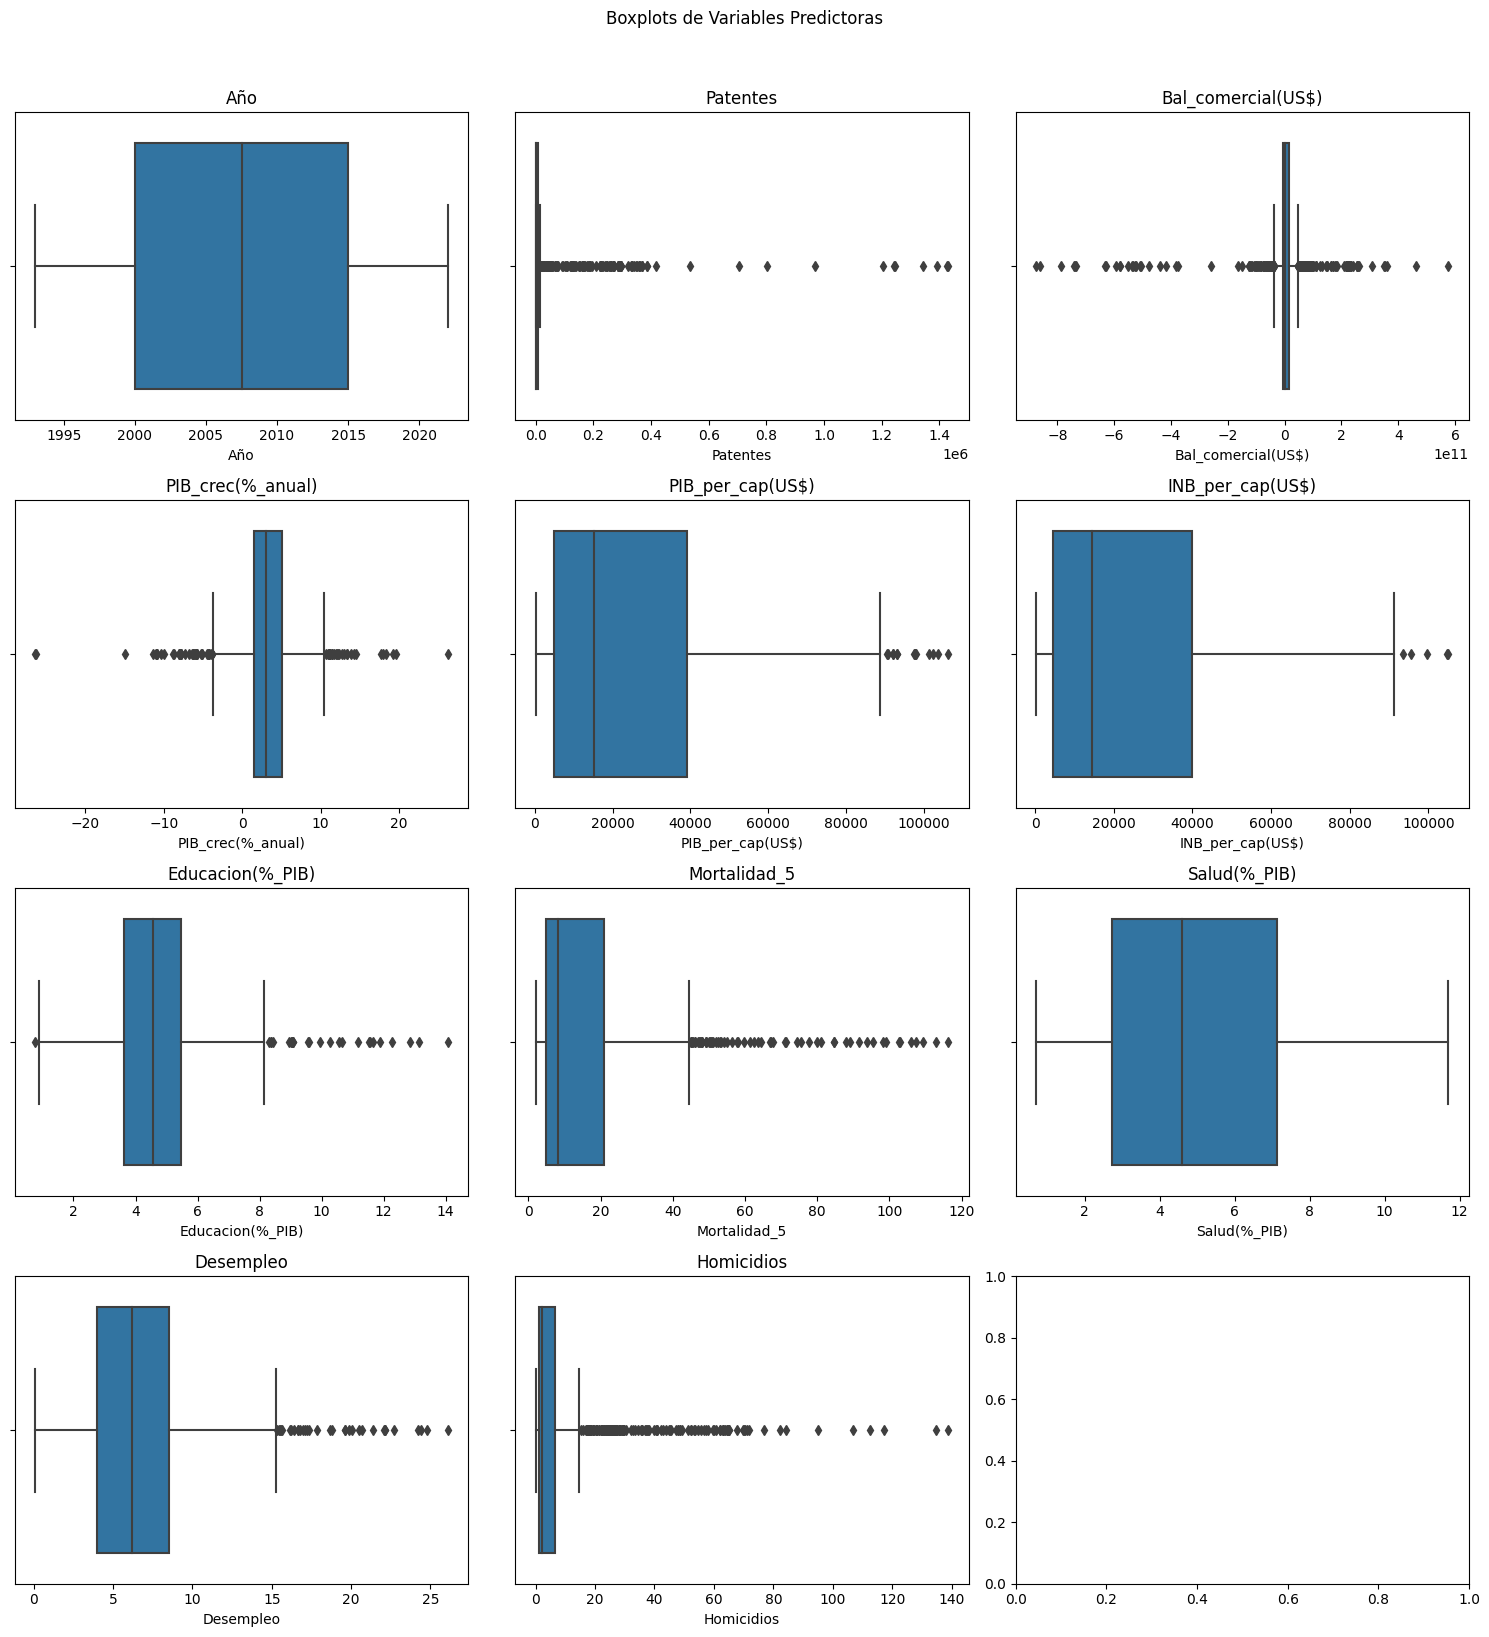

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Número de variables
num_variables = len(x.columns)

# Número de filas y columnas para organizar los gráficos
num_rows = num_variables // 3 + (num_variables % 3 > 0)
num_cols = 3

# Crea subgráficos
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 4 * num_rows))
fig.suptitle('Boxplots de Variables Predictoras', y=1.02)

# Itera sobre las variables y crea los boxplots
for i, (variable, ax) in enumerate(zip(x.columns, axes.flatten())):
    sns.boxplot(x=x[variable], ax=ax)
    ax.set_title(f'{variable}')

# Ajusta el diseño para evitar solapamiento
plt.tight_layout()

# Muestra la visualización
plt.show()

In [ ]:
# Calcula el rango intercuartílico (IQR) para 'Educacion(%_PIB)'
Q1_educacion = x['Educacion(%_PIB)'].quantile(0.25)
Q3_educacion = x['Educacion(%_PIB)'].quantile(0.75)
IQR_educacion = Q3_educacion - Q1_educacion

# Define umbrales para identificar outliers en 'Educacion(%_PIB)'
lower_bound_educacion = Q1_educacion - 1.5 * IQR_educacion
upper_bound_educacion = Q3_educacion + 1.5 * IQR_educacion

# Identifica outliers en 'Educacion(%_PIB)'
outliers_educacion = (x['Educacion(%_PIB)'] < lower_bound_educacion) | (x['Educacion(%_PIB)'] > upper_bound_educacion)

# Filtra los outliers en 'x' y obtén los correspondientes datos de 'y' (esperanza de vida)
outliers_data = data[outliers_educacion]
outliers_paises_anios = outliers_data[['Pais_id', 'Año']]

# Muestra los registros atípicos y a qué país y años corresponden
print("Registros Atípicos en 'Educacion(%_PIB)':")
outliers_data[['Pais_id', 'Año','Educacion(%_PIB)']]

Registros Atípicos en 'Educacion(%_PIB)':


series_id,Pais_id,Año,Educacion(%_PIB)
87,BOL,2020,8.437110
88,BOL,2021,8.294060
278,CUB,2001,8.358090
279,CUB,2002,9.571170
280,CUB,2003,9.940860
281,CUB,2004,10.268230
282,CUB,2005,10.557780
283,CUB,2006,9.057170
284,CUB,2007,11.868210
285,CUB,2008,14.059080


In [ ]:
data.iloc[330]

series_id
Pais_id                            DOM
Año                               1993
Patentes                     16.475504
Bal_comercial(US$)   -683384000.000001
PIB_crec(%_anual)             7.364513
PIB_per_cap(US$)           1726.625479
INB_per_cap(US$)                1620.0
Educacion(%_PIB)               0.77395
Mortalidad_5                      52.4
Mortalidad_neo                    23.1
Salud(%_PIB)                  2.406244
Desempleo                        6.343
EDV                             68.472
Homicidios                   12.275487
Name: 330, dtype: object

In [ ]:
# Calcula el rango intercuartílico (IQR) para 'Homicidios'
Q1_homicidios = x['Homicidios'].quantile(0.25)
Q3_homicidios = x['Homicidios'].quantile(0.75)
IQR_homicidios = Q3_homicidios - Q1_homicidios

# Define umbrales para identificar outliers en 'Homicidios'
lower_bound_homicidios = Q1_homicidios - 1.5 * IQR_homicidios
upper_bound_homicidios = Q3_homicidios + 1.5 * IQR_homicidios

# Identifica outliers en 'Homicidios'
outliers_homicidios = (x['Homicidios'] < lower_bound_homicidios) | (x['Homicidios'] > upper_bound_homicidios)

# Filtra los outliers en 'x' y obtén los correspondientes datos de 'y' (esperanza de vida)
outliers_data_homicidios = data[outliers_homicidios]
outliers_paises_anios_homicidios = outliers_data_homicidios[['Pais_id', 'Año']]

# Muestra los registros atípicos y a qué país y años corresponden
print("Registros Atípicos en 'Homicidios':")
outliers_data_homicidios[['Pais_id', 'Año','Homicidios']]

Registros Atípicos en 'Homicidios':


series_id,Pais_id,Año,Homicidios
90,BRA,1993,17.680255
91,BRA,1994,18.543499
92,BRA,1995,20.793213
93,BRA,1996,23.424882
94,BRA,1997,24.033101
...,...,...,...
895,VEN,2018,44.979235
896,VEN,2019,40.984846
897,VEN,2020,29.427401
898,VEN,2021,19.305056


In [ ]:
x['Homicidios']

0       6.201750
1       6.201750
2       6.201750
3       6.201750
4       6.201750
         ...    
895    44.979235
896    40.984846
897    29.427401
898    19.305056
899    18.589542
Name: Homicidios, Length: 900, dtype: float64

**Análisis Estadístico:**

Utilizamos medidas estadísticas como el rango intercuartílico (IQR) para identificar outliers.
Definimos umbrales para identificar valores atípicos. Los valores que están por debajo de Q1 - 1.5 * IQR o por encima de Q3 + 1.5 * IQR podrían considerarse outliers.

In [ ]:
import numpy as np

# Calcula el rango intercuartílico (IQR) para cada variable en 'x'
Q1 = x.quantile(0.25)
Q3 = x.quantile(0.75)
IQR = Q3 - Q1

# Define umbrales para identificar outliers
lower_bound = Q1 - 3.5 * IQR
upper_bound = Q3 + 3.5 * IQR

# Identifica outliers para cada variable
outliers = ((x < lower_bound) | (x > upper_bound)).any(axis=1)

# Filtra los outliers en 'x' y 'y'
x_no_outliers = x[~outliers]
y_no_outliers = y[~outliers]

In [ ]:
x_no_outliers

series_id,Año,Patentes,Bal_comercial(US$),PIB_crec(%_anual),PIB_per_cap(US$),INB_per_cap(US$),Educacion(%_PIB),Mortalidad_5,Salud(%_PIB),Desempleo,Homicidios
0,1993,787.000000,-5.692332e+09,8.206979,6957.417499,7110.000000,1.323882,26.500000,5.385922,10.100,6.201750
1,1994,694.000000,-7.914860e+09,5.836201,7464.474737,7600.000000,1.401981,25.400000,5.385922,11.760,6.201750
2,1995,676.000000,-1.059485e+09,-2.845210,7383.704510,7340.000000,1.476775,24.300000,5.385922,18.800,6.201750
3,1996,1097.000000,-1.767000e+09,5.526690,7690.157003,7700.000000,3.731980,23.200000,5.385922,17.110,6.201750
4,1997,824.000000,-6.485300e+09,8.111047,8176.771195,8110.000000,3.702754,22.200000,5.385922,14.820,6.201750
...,...,...,...,...,...,...,...,...,...,...,...
874,1997,201.000000,6.242961e+09,6.370931,3725.988118,3440.000000,4.502659,24.500000,2.614071,11.160,18.339615
875,1998,190.354049,-1.606084e+09,0.294055,3886.039254,3390.000000,4.490444,23.400000,2.614071,11.150,19.358556
876,1999,175.389521,3.677104e+09,-5.970458,4087.829348,3540.000000,4.486311,22.400000,2.614071,14.530,24.925982
898,2021,171.642265,1.262672e+09,2.777923,15184.365447,13095.854192,4.484203,24.200000,1.676206,6.471,19.305056


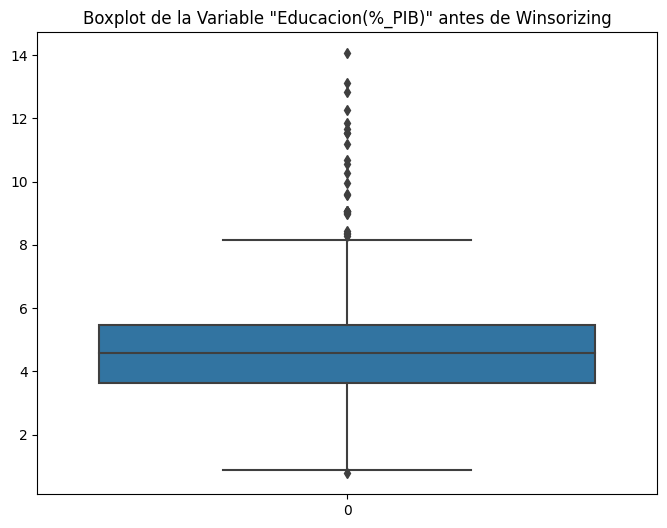

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crea un boxplot de la variable 'Educacion' después de Winsorizing
plt.figure(figsize=(8, 6))
sns.boxplot(x['Educacion(%_PIB)'])
plt.title('Boxplot de la Variable "Educacion(%_PIB)" antes de Winsorizing')
plt.show()

In [ ]:
from scipy.stats.mstats import winsorize

# Define los límites de Winsorizing (ajusta según tu preferencia)
lower_limit = 0.05
upper_limit = 0.05

# Aplica Winsorizing a la variable 'Educacion'
x['Educacion(%_PIB)'] = winsorize(x['Educacion(%_PIB)'], limits=[lower_limit, upper_limit])

# Puedes ajustar los límites según tu necesidad

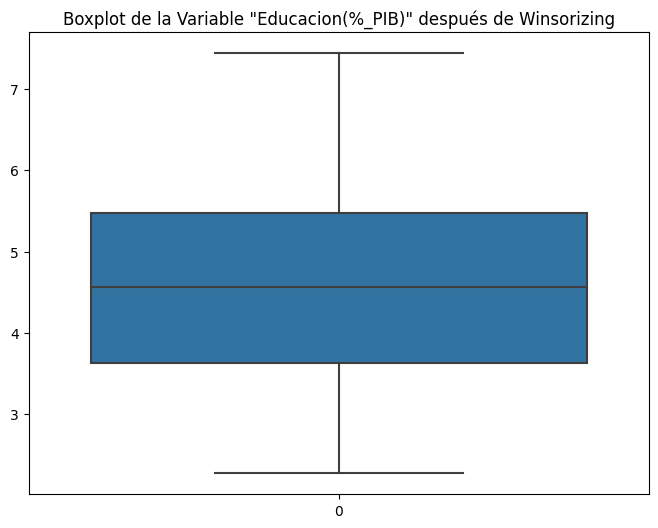

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crea un boxplot de la variable 'Educacion' después de Winsorizing
plt.figure(figsize=(8, 6))
sns.boxplot(x['Educacion(%_PIB)'])
plt.title('Boxplot de la Variable "Educacion(%_PIB)" después de Winsorizing')
plt.show()

### Split en train y test

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state =123)

In [ ]:
print('Tamaño del set de train',x_train.shape)
print('Tamaño del set de test:',x_test.shape)

Tamaño del set de train (630, 11)
Tamaño del set de test: (270, 11)


### Normalización de los datos

In [ ]:
# Observamos los valores estadísticos previo al escalamiento
data.describe()

series_id,Año,Patentes,Bal_comercial(US$),PIB_crec(%_anual),PIB_per_cap(US$),INB_per_cap(US$),Educacion(%_PIB),Mortalidad_5,Mortalidad_neo,Salud(%_PIB),Desempleo,EDV,Homicidios
count,900.000000,9.000000e+02,9.000000e+02,900.000000,900.000000,900.00000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,2007.500000,4.066962e+04,-1.861540e+09,3.179171,23437.029600,23517.96784,4.705775,16.094480,8.284080,4.924977,6.726277,76.132523,9.116142
std,8.660254,1.442191e+05,1.145698e+11,4.160415,22567.070914,22589.54295,1.667668,17.941401,8.571339,2.528624,3.898014,5.122885,16.894723
min,1993.000000,1.000000e+00,-8.745476e+11,-26.339017,301.500786,320.00000,0.773950,2.060527,0.611731,0.711635,0.095000,58.418000,0.100992
25%,2000.000000,9.419665e+01,-5.798738e+09,1.548458,4971.356479,4650.00000,3.624336,5.000000,2.773371,2.719736,3.990000,72.851000,1.044602
50%,2007.500000,1.286000e+03,3.461529e+08,2.997814,15301.081730,14390.00000,4.569783,8.100000,4.400000,4.607938,6.190000,76.956793,2.243261
75%,2015.000000,6.328250e+03,1.481451e+10,5.118401,39078.976003,40002.50000,5.476923,20.900000,10.900000,7.122640,8.495000,80.163415,6.565712
max,2022.000000,1.430501e+06,5.766511e+11,26.170246,106148.778628,105070.00000,14.059080,116.200000,53.500000,11.702788,26.090000,84.560000,138.773986


In [ ]:
# Utilizamos la librería de sklearn para escalar nuestras variables predictoras
from sklearn.preprocessing import StandardScaler

esc = StandardScaler()

x_train_esc = esc.fit_transform(x_train)
x_test_esc = esc.transform(x_test)

### Entrenamiento del modelo

In [ ]:
# Entrenamos el modelo utilizando la librería sklearn
from sklearn.linear_model import LinearRegression

modelo = LinearRegression()
modelo.fit(x_train_esc, y_train)

LinearRegression()

### Predicción

In [ ]:
# Definimos la variable de predicción 
y_pred = modelo.predict(x_test_esc)

In [ ]:
y_pred.size

270

### Validaciones del Modelo de Regresión:
Se procede a evaluar si se  con las suposiciones del modelo utilizado

- *Linealidad:* entre las variables independientes y la variable dependiente. Utilizamos gráfico de dispersión.

- *Independencia:* Asegurar que los errores (residuos) no estén correlacionados entre sí. Examinamos el gráfico de residuos.

- *Homocedasticidad:* Verificar que la varianza de los errores sea constante en todos los niveles de las variables independientes. Lo observamos en un gráfico de residuos frente a las predicciones.

- *Normalidad de los Residuos:* Comprobar que los residuos sigan una distribución normal. Lo evaluamos mediante un histograma de los residuos.

Linealidad (Gráfico de Dispersión):

- Un gráfico simple donde el eje x representa los valores reales y el eje y representa las predicciones.
- Vemos cómo se alinean las predicciones con los valores reales. 
- Si la relación entre las variables es lineal, deberíamos ver una dispersión uniforme alrededor de la línea diagonal.

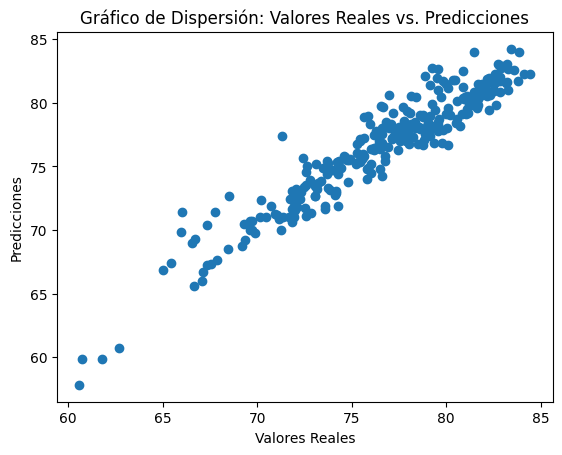

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Gráfico de Dispersión: Valores Reales vs. Predicciones')
plt.show()

Independencia (Gráfico de Residuos):

- Un gráfico que muestra la diferencia entre los valores reales y las predicciones en función de los valores reales.
- Podemos identificar patrones en los residuos y verificar si hay heterocedasticidad.
- Deberían distribuirse aleatoriamente alrededor de la línea horizontal cero. No debería haber un patrón discernible.

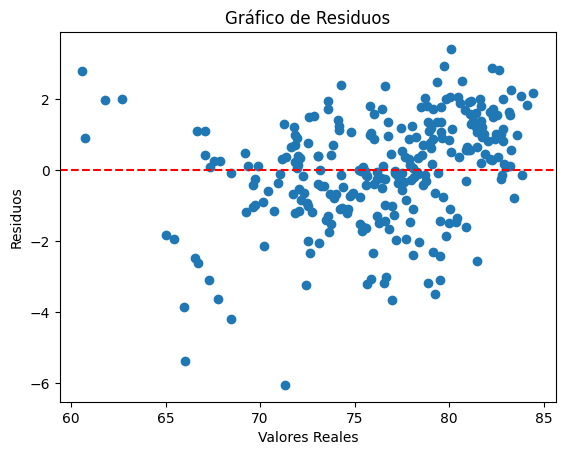

In [ ]:
residuals = y_test - y_pred
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores Reales')
plt.ylabel('Residuos')
plt.title('Gráfico de Residuos')
plt.show()


Homocedasticidad (Gráfico de Residuos vs. Predicciones):

- Aquí, buscamos una dispersión constante de los residuos en todos los niveles de las predicciones. 
- No debería haber un patrón en forma de cono o embudo.

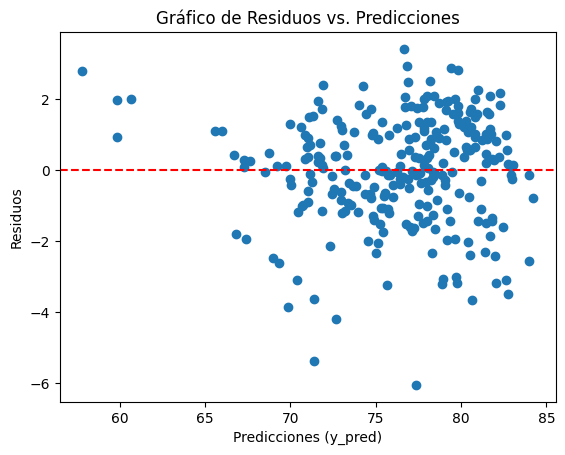

In [ ]:
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicciones (y_pred)')
plt.ylabel('Residuos')
plt.title('Gráfico de Residuos vs. Predicciones')
plt.show()

Histograma de residuos:

- Un histograma que muestra la distribución de los residuos.
- Puedes verificar si los residuos siguen una distribución normal.

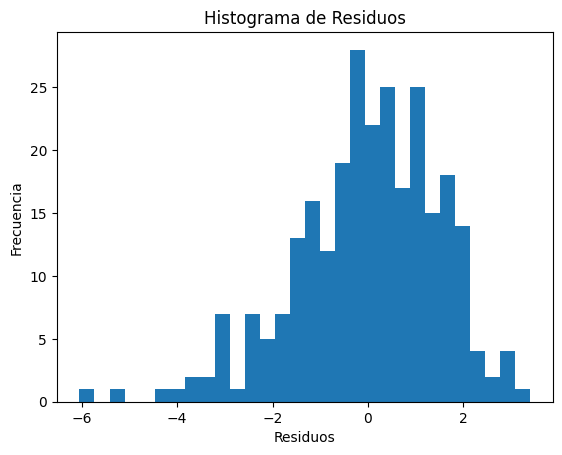

In [ ]:
plt.hist(residuals, bins=30)
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Histograma de Residuos')
plt.show()

**Se pudo validar todas las suposiciones del modelo de regresión lineal, por lo tanto se procede a evaluar las métricas de los resultados obtenido en el modelo**

### Métricas de desempeño

#### **Error Absoluto Medio (MAE):**

- El MAE mide el promedio de las diferencias absolutas entre las predicciones y los valores reales.
- Cuanto más bajo sea el MAE, mejor será el rendimiento.

In [ ]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print(f'MAE: {mae}')

MAE: 1.1830300642945974


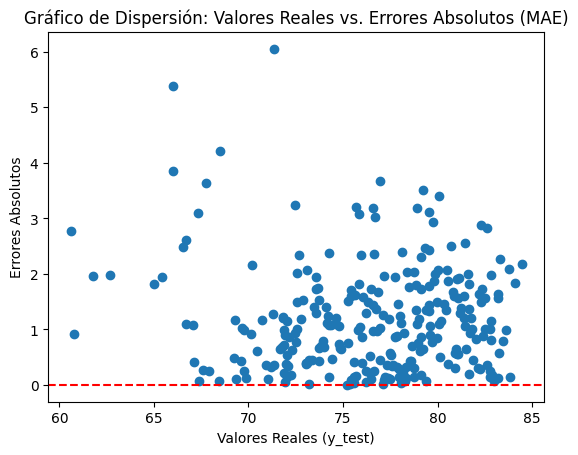

In [ ]:
import matplotlib.pyplot as plt

# Calcula los errores absolutos
mae_errors = np.abs(y_test - y_pred)

# Gráfico de dispersión de MAE
plt.scatter(y_test, mae_errors)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores Reales (y_test)')
plt.ylabel('Errores Absolutos')
plt.title('Gráfico de Dispersión: Valores Reales vs. Errores Absolutos (MAE)')
plt.show()

**El MAE (Error Absoluto Medio) de 1.1977 significa que, en promedio, las predicciones de esperanza de vida difieren en aproximadamente 1.2 años de los valores reales**

Si bien el resultado ya parece ser muy bueno, para obtener una evaluación más efectiva de este resultado la llevaremos a nuestro contexto, haciendo una comparación con la magnitud de la EDV en nuestro conjunto de datos:

In [ ]:
mean_life_expectancy = y_test.mean()
std_life_expectancy = y_test.std()

print(f'Media de Esperanza de Vida: {mean_life_expectancy:.2f} años')
print(f'Desviación Estándar de Esperanza de Vida: {std_life_expectancy:.2f} años')

mae_percentage_of_mean = (mae / mean_life_expectancy) * 100

print(f'MAE como porcentaje de la Media: {mae_percentage_of_mean:.2f}%')

Media de Esperanza de Vida: 76.36 años
Desviación Estándar de Esperanza de Vida: 4.79 años
MAE como porcentaje de la Media: 1.55%


**Interpretación:**

- El MAE del 1.55% sugiere que, en promedio, las predicciones son bastante precisas en relación con la magnitud de la esperanza de vida en tu conjunto de datos.
- En el contexto de la esperanza de vida, un MAE del 1.55% podría considerarse como un buen desempeño, especialmente si la variabilidad natural de la esperanza de vida en nuestro conjunto de datos es mayor que este porcentaje.

#### **Error Cuadrático Medio (MSE):**

- El MSE mide el promedio de los cuadrados de las diferencias entre las predicciones y los valores reales.
- Penaliza errores más grandes más fuertemente que el MAE.

In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')

MSE: 2.314538064942229


Tal como el valor del MAE, el MSE es realtivamente pequeño respecto a la media de EVD, afirma el buen desempeño de nuestro modelo de predicción

**RMSE (Raíz del Error Cuadrático Medio):**

- El RMSE es simplemente la raíz cuadrada del MSE.
- Es más interpretable que el MSE ya que proporciona una medida del error en la misma escala que la variable dependiente. Cuanto más cercano a cero, mejor.

In [ ]:
rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')

RMSE: 1.5213605966181158


#### **Coeficiente de Determinación (R²):**

- El R² indica la proporción de la variabilidad en la variable dependiente que es predecible a partir de las variables independientes.
- Un valor más cercano a 1 indica un mejor ajuste.

In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f'R²: {r2}')

R²: 0.8986751876045954


Un (R²) de 0.8977 significa que aproximadamente el 89.77% de la variabilidad en la esperanza de vida es explicada por las variables independientes incluidas en el modelo.

- **Interpretación:** Un (R²) de 0.8977 es bastante alto y sugiere que el modelo está capturando bien las tendencias y patrones en los datos de esperanza de vida. Casi el 90% de la variabilidad en la esperanza de vida se puede explicar mediante las variables incluidas en el modelo.

**CONCLUSIÓN: se evaluó el desempeño del modelo a través de distintas métricas y todas arrojan resultados positivos, indicando que nuestro modelo consigue realizar muy buenas predicciones del valor de esperanza de vida esperada.**

### Validación del modelo

**Validación Cruzada (Cross-Validation):**
- La validación cruzada k-fold divide el conjunto de datos en k partes (folds) y realiza k iteraciones de entrenamiento y evaluación. En cada iteración, un fold se utiliza como conjunto de prueba y los k-1 folds restantes se utilizan para entrenar el modelo. Esto proporciona k estimaciones de rendimiento que se promedian para obtener una medida general.

Creamos una función que utiliza la validación cruzada y obtiene las métricas de nuestro interés en cada iteración de la validación según el parámetro 'cv'. 

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def cross_val_metrics(estimator, X, y, cv=5):
    # Realiza la validación cruzada
    y_pred = cross_val_predict(estimator, X, y, cv=cv)

    # Calcula las métricas para cada iteración
    metrics = []
    for i in range(cv):
        start = i * len(y) // cv
        end = (i + 1) * len(y) // cv
        y_true_i = y[start:end]
        y_pred_i = y_pred[start:end]

        mae_i = mean_absolute_error(y_true_i, y_pred_i)
        mse_i = mean_squared_error(y_true_i, y_pred_i)
        rmse_i = np.sqrt(mse_i)
        r2_i = r2_score(y_true_i, y_pred_i)

        metrics.append({'MAE': mae_i, 'MSE': mse_i, 'RMSE': rmse_i, 'R²': r2_i})

    return metrics

In [ ]:
# Uso de la función con nuestro modelo
metrics_per_iteration = cross_val_metrics(modelo, x, y, cv=5)

# Imprime los resultados para cada iteración
for i, metrics in enumerate(metrics_per_iteration, 1):
    print(f'Iteración {i}: {metrics}')

# Calcula el promedio de cada métrica
avg_metrics = {
    'MAE': np.mean([m['MAE'] for m in metrics_per_iteration]),
    'MSE': np.mean([m['MSE'] for m in metrics_per_iteration]),
    'RMSE': np.mean([m['RMSE'] for m in metrics_per_iteration]),
    'R²': np.mean([m['R²'] for m in metrics_per_iteration]),
}

print(f'Promedio de métricas: {avg_metrics}')

Iteración 1: {'MAE': 1.3164765571613577, 'MSE': 3.6539840951484597, 'RMSE': 1.9115397184334046, 'R²': 0.9136481559423963}
Iteración 2: {'MAE': 1.7012631226909352, 'MSE': 4.515870731160301, 'RMSE': 2.1250578183099633, 'R²': 0.608692785443392}
Iteración 3: {'MAE': 1.5373177080927125, 'MSE': 3.5877331359869347, 'RMSE': 1.894131235154242, 'R²': 0.9015907500332118}
Iteración 4: {'MAE': 1.734526017690064, 'MSE': 4.5511655502832244, 'RMSE': 2.1333460924761423, 'R²': 0.7033369861065342}
Iteración 5: {'MAE': 1.7451220155018388, 'MSE': 6.178566754940726, 'RMSE': 2.4856722943583542, 'R²': 0.647185380156341}
Promedio de métricas: {'MAE': 1.606941084227382, 'MSE': 4.497464053503928, 'RMSE': 2.109949431746421, 'R²': 0.754890811536375}


### Interpretabilidad del modelo

In [ ]:
print("Coeficientes:")
for feature, coef in zip(x.columns, modelo.coef_):
    print(f"{feature}: {coef}")

print(f"Intercepto: {modelo.intercept_}")

Coeficientes:
Año: 0.28342990344363483
Patentes: 0.06840429492105171
Bal_comercial(US$): 0.4061336023295702
PIB_crec(%_anual): 0.08956526112130736
PIB_per_cap(US$): 1.4653855636799094
INB_per_cap(US$): 0.22051323794720068
Educacion(%_PIB): -0.7660241501965426
Mortalidad_5: -3.1422890583288723
Salud(%_PIB): 0.7966115923949602
Desempleo: 0.33527210725048706
Homicidios: -0.761709797974981
Intercepto: 76.03579356625733


---

### Predicción incluyendo la variable Pais_id

In [ ]:
y2 = df_encoded["EDV"]
x2 = df_encoded.drop(['EDV','Mortalidad_neo'], axis = 1)

In [ ]:
from sklearn.model_selection import train_test_split

x_train2, x_test2, y_train2, y_test2 = train_test_split(x2,y2, test_size = 0.3, random_state =123)

In [ ]:
from sklearn.preprocessing import StandardScaler

esc = StandardScaler()

x_train2_esc = esc.fit_transform(x_train2)
x_test2_esc = esc.transform(x_test2)

In [ ]:
from sklearn.linear_model import LinearRegression

modelo2 = LinearRegression()
modelo2.fit(x_train2_esc, y_train2)

LinearRegression()

In [ ]:
y_pred2 = modelo2.predict(x_test2_esc)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae2 = mean_absolute_error(y_test2, y_pred2)
mse2 = mean_squared_error(y_test2, y_pred2)
rmse2 = np.sqrt(mse2)
r22 = r2_score(y_test2, y_pred2)

print(f'MAE2: {mae2}')
print(f'MSE2: {mse2}')
print(f'RMSE2: {rmse2}')
print(f'R²2: {r22}')

MAE2: 0.6648186118142478
MSE2: 0.950166995145473
RMSE2: 0.9747650974185899
R²2: 0.9584040141807634


In [ ]:
# Uso de la función con nuestro modelo
metrics_per_iteration = cross_val_metrics(modelo2, x2, y2, cv=5)

# Imprime los resultados para cada iteración
for i, metrics in enumerate(metrics_per_iteration, 1):
    print(f'Iteración {i}: {metrics}')

# Calcula el promedio de cada métrica
avg_metrics = {
    'MAE': np.mean([m['MAE'] for m in metrics_per_iteration]),
    'MSE': np.mean([m['MSE'] for m in metrics_per_iteration]),
    'RMSE': np.mean([m['RMSE'] for m in metrics_per_iteration]),
    'R²': np.mean([m['R²'] for m in metrics_per_iteration]),
}

print(f'Promedio de métricas: {avg_metrics}')

Iteración 1: {'MAE': 2.4849354855680357, 'MSE': 11.0999053488034, 'RMSE': 3.3316520449775964, 'R²': 0.7376843273601909}
Iteración 2: {'MAE': 1.8158137853996783, 'MSE': 5.8029207316162195, 'RMSE': 2.4089252233343026, 'R²': 0.49716790338723893}
Iteración 3: {'MAE': 2.9774730009695354, 'MSE': 11.491171431924174, 'RMSE': 3.3898630402900016, 'R²': 0.6848044380691196}
Iteración 4: {'MAE': 1.953017328557829, 'MSE': 5.701223608652909, 'RMSE': 2.387723520144849, 'R²': 0.6283716423986601}
Iteración 5: {'MAE': 2.290824404090411, 'MSE': 10.17718087898361, 'RMSE': 3.190169412270077, 'R²': 0.41885256802842374}
Promedio de métricas: {'MAE': 2.304412800917098, 'MSE': 8.854480399996064, 'RMSE': 2.9416666482033653, 'R²': 0.5933761758487266}


In [ ]:
print("Coeficientes:")
for feature, coef in zip(x2.columns, modelo.coef_):
    print(f"{feature}: {coef}")

print(f"Intercepto: {modelo.intercept_}")

Coeficientes:
Año: 0.28342990344363483
Patentes: 0.06840429492105171
Bal_comercial(US$): 0.4061336023295702
PIB_crec(%_anual): 0.08956526112130736
PIB_per_cap(US$): 1.4653855636799094
INB_per_cap(US$): 0.22051323794720068
Educacion(%_PIB): -0.7660241501965426
Mortalidad_5: -3.1422890583288723
Salud(%_PIB): 0.7966115923949602
Desempleo: 0.33527210725048706
Homicidios: -0.761709797974981
Intercepto: 76.03579356625733


---

### Testeo con nuevos datos

Probamos nuestro modelo en un entorno como en el que se desempeñará

In [4]:
# Tomamos como ejemplo una muestra de una fila de nuestros datos
n_filas_muestra = 1  
x_new = x.sample(n=n_filas_muestra, random_state=126)

NameError: name 'x' is not defined

In [ ]:
x_new.columns

Index(['Año', 'Patentes', 'Bal_comercial(US$)', 'PIB_crec(%_anual)',
       'PIB_per_cap(US$)', 'INB_per_cap(US$)', 'Educacion(%_PIB)',
       'Mortalidad_5', 'Salud(%_PIB)', 'Desempleo', 'Homicidios'],
      dtype='object', name='series_id')

In [ ]:
data.iloc[x_new.index.values]['EDV']

863    78.539024
Name: EDV, dtype: float64

In [ ]:
# Supongamos que x_train son tus datos de entrenamiento y x_new son tus nuevos datos
esc = StandardScaler()
esc.fit(x_train)

# Asegúrate de que x_new tenga nombres de columnas (features)
x_new.columns = x_train.columns

# Ahora, puedes usar el escalamiento en tus nuevos datos
x_new_scaled = esc.transform(x_new)
prediccion = modelo.predict(x_new_scaled)
prediccion.item()

70.81464627906723

In [ ]:
from sklearn.preprocessing import StandardScaler

# Ajusta el scaler con los datos de entrenamiento
esc = StandardScaler()
esc.fit(x_train)

def predecir_esperanza_vida(modelo, scaler, x_train, nuevos_datos):
    # Asegúrate de que los nuevos datos tengan los mismos nombres de columnas que los datos de entrenamiento
    nuevos_datos.columns = x_train.columns
    
    # Escala los nuevos datos usando el scaler ajustado con los datos de entrenamiento
    nuevos_datos_scaled = scaler.transform(nuevos_datos)
    
    # Realiza la predicción
    prediccion = modelo.predict(nuevos_datos_scaled)
    
    # Imprime el resultado
    print(f"La esperanza de vida predicha es: {round(prediccion.item(),2)} años")

In [ ]:
# Llama a la función con los valores de las variables independientes
predecir_esperanza_vida(modelo, esc, x_train, x_new)

La esperanza de vida predicha es: 70.81 años


In [ ]:
def predecir_esperanza_vida(modelo, scaler, x_train, nuevos_datos):
    # Asegúrate de que los nuevos datos tengan los mismos nombres de columnas que los datos de entrenamiento
    nuevos_datos.columns = x_train.columns
    
    # Si hay más de una fila en nuevos_datos, ajusta el scaler con los datos de entrenamiento
    if len(nuevos_datos) > 1:
        scaler.fit(x_train)
    
    # Escala los nuevos datos usando el scaler
    nuevos_datos_scaled = scaler.transform(nuevos_datos)
    
    # Realiza la predicción
    prediccion = modelo.predict(nuevos_datos_scaled)
    
    # Imprime el resultado
    if len(nuevos_datos) == 1:
        print(f"La esperanza de vida predicha es: {round(prediccion.item(), 2)} años")
    else:
        for i, pred in enumerate(prediccion):
            print(f"Para la fila {i + 1}, la esperanza de vida predicha es: {round(pred.item(), 2)} años")

In [ ]:
len(x_new)

1

In [ ]:
from sklearn.pipeline import make_pipeline

In [ ]:
pipe = make_pipeline(esc, modelo)

In [ ]:
pipe.fit(x_train, y_train)
pipe.predict(x_new)

array([80.01173602])

In [ ]:
import joblib
joblib.dump(pipe, 'pipe.joblib')

['pipe.joblib']

In [ ]:
# load the pipeline from a file
same_pipe = joblib.load('pipe.joblib')

In [ ]:
same_pipe.predict(x_new)

array([80.01173602])

In [ ]:
data[data['Pais_id'] == 'ARG'][['Año', 'Homicidios']]

series_id,Año,Homicidios
0,1993,6.201750
1,1994,6.201750
2,1995,6.201750
3,1996,6.201750
4,1997,6.201750
5,1998,6.201750
6,1999,6.201750
7,2000,6.201750
8,2001,8.348343
9,2002,9.423248


In [ ]:
wb.data.DataFrame(economy='ARG', series='VC.IHR.PSRC.P5', mrv=40).transpose()

economy,ARG
YR2001,8.348343
YR2002,9.423248
YR2003,7.751156
YR2004,6.046219
YR2005,5.625728
YR2006,5.347438
YR2007,5.364114
YR2008,5.887207
YR2009,6.493899
YR2010,5.800469
